In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
# read data

path = '/scratch/pchen25/clim680_dataset/MidMiocene/atm/'
file_name = 'B.MMIOx2_C5_280_WISOon_aeroZonal_ANN_concat.nc'
ds = xr.open_dataset(path+file_name)

ds

<xarray.Dataset>
Dimensions:        (lev: 30, ilev: 31, time: 12, lat: 96, lon: 144, slat: 95, slon: 144, nbnd: 2)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time           (time) object 0250-08-02 12:00:00 ... 0251-01-01 00:00:00
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Dimensions without coordinates: nbnd
Data variables: (12/211)
    hyam           (lev) float64 ...
    hybm           (lev) float64 ...
    hyai           (ilev) float64 ...
    hybi           (ilev) float64 ...
    P0             float64 ...
    date           (time) int32 ...
    ...             ...
    pom_a1_SRF     (time, lat, lon) float32 ...
    so4_a1_SRF     (time, lat, lon) float32 ...
    so4_a2_SRF     (time, lat, lon) float32 ...
    so4_a3_SRF     (time, lat, lon) float32 ...
    soa_a1_SRF     (time, lat, lon) float32 ...
    soa_a2_SRF     (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             B.MMIOx2_C5_280_WISOon_aeroZonal
    title:            UNSET
    logname:          pacosta
    host:             r14i5n22
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/scratch/pacosta/B.MMIOx2_C5_280_WISOon_aeroZonal...
    topography_file:  /glade/work/pacosta/PaleoBC/heroldn/gx1vMIO/cami_bnd_to...
    history:          Wed Aug 30 10:47:53 2023: ncrcat -O B.MMIOx2_C5_280_WIS...
    NCO:              netCDF Operators version 5.1.4 (Homepage = http://nco.s...

In [3]:
# input mask

var = 'LANDFRAC'
mask = ds[var][0,:,:]

mask

<xarray.DataArray 'LANDFRAC' (lat: 96, lon: 144)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    time     object 0250-08-02 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         fraction
    long_name:     Fraction of sfc area covered by land
    cell_methods:  time: mean

In [4]:
# input variables

var = 'TS'
ts = ds[var]

ts

<xarray.DataArray 'TS' (time: 12, lat: 96, lon: 144)>
[165888 values with dtype=float32]
Coordinates:
  * time     (time) object 0250-08-02 12:00:00 ... 0251-01-01 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

In [5]:
# input the first time step of the variable

ts_jan = ds[var][0,:,:]

ts_jan

<xarray.DataArray 'TS' (lat: 96, lon: 144)>
array([[256.96942, 256.9595 , 256.94406, ..., 256.97757, 256.96652, 256.96304],
       [259.6405 , 259.7432 , 260.07892, ..., 259.57117, 259.5712 , 259.87216],
       [259.9222 , 260.3675 , 260.3607 , ..., 259.7008 , 259.7475 , 259.9187 ],
       ...,
       [259.25848, 259.0928 , 258.89944, ..., 259.7199 , 259.57162, 259.42938],
       [257.96085, 257.87152, 257.75864, ..., 258.22754, 258.12695, 258.0357 ],
       [257.22418, 257.20355, 257.1829 , ..., 257.27814, 257.26028, 257.24405]],
      dtype=float32)
Coordinates:
    time     object 0250-08-02 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

''

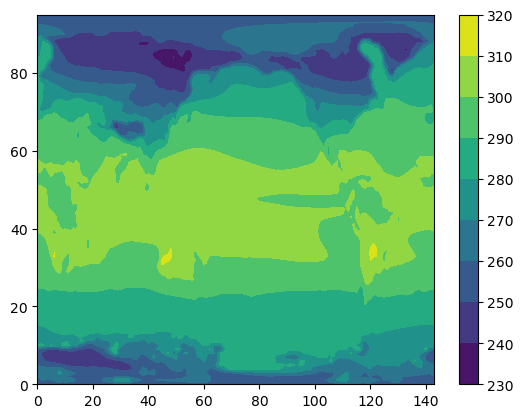

In [6]:
# ========= (1a) - countour ============

plt.contourf(ts_jan)
plt.colorbar()
;

''

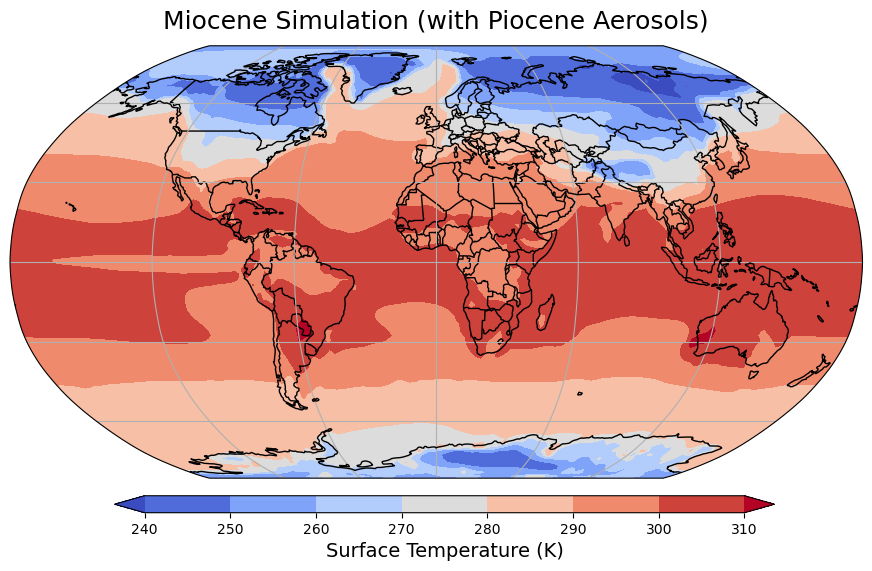